<h1><center>Mineração Estatística de Dados</center></h1>
<h2><center>Projeto 1: Pré-processamento de dadose classificação</center></h2>
<br>
<br>
<br>


<h2><center>Bruno Gomes Coelho - 9791160</center></h2>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Motivação

Iremos desenvolver nesse projeto o pipeline de ciência de dados e aprendizado de máquina considerando os dados disponíveis [aqui](https://www.kaggle.com/fschwartzer/tmd-dataset-5-seconds-sliding-window). Algumas das etapas consideras:

- Pré processamento
- EDA
- Algoritmos básicos
- Algotimos com otimização e variação de parâmetros


# 1 - Imports e ler os dados

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.preprocessing import minmax_scale, scale
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
FILE = "data/dataset_5secondWindow%5B1%5D.csv"
df = pd.read_csv(FILE)
df.shape

(5893, 14)

In [3]:
df.head()

,time,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.gyroscope#mean,android.sensor.gyroscope#min,android.sensor.gyroscope#max,android.sensor.gyroscope#std,sound#mean,sound#min,sound#max,sound#std,target
0,78.0,9.811476,9.758895,9.849411,0.014626,0.001651,0.000000,0.003533,0.000737,0.000000,0.000000,0.000000,0.000000,Still
1,145.0,9.939207,7.707437,17.146631,1.775944,0.036326,0.011669,0.059388,0.020290,89.200210,89.065143,89.335277,0.191013,Car
2,150.0,9.827178,9.804817,9.849262,0.011199,0.001525,0.000000,0.002609,0.000713,0.000000,0.000000,0.000000,0.000000,Still
3,105.0,9.673039,7.659674,12.304298,0.862553,0.036440,0.020463,0.052512,0.010553,87.470377,87.470377,87.470377,2.284186,Car
4,77.0,9.993466,8.965621,10.891645,0.504117,0.183202,0.020667,0.380875,0.098819,89.770732,89.770732,89.770732,0.006389,Car


Temos uma ideia de como estão nossos dados, possuindo 5983 linhas e 14 colunas.


- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# 2 Pré-processamento

## Verificar NaN

In [4]:
df.isna().sum()

time                                 0
android.sensor.accelerometer#mean    0
android.sensor.accelerometer#min     0
android.sensor.accelerometer#max     0
android.sensor.accelerometer#std     0
android.sensor.gyroscope#mean        0
android.sensor.gyroscope#min         0
android.sensor.gyroscope#max         0
android.sensor.gyroscope#std         0
sound#mean                           0
sound#min                            0
sound#max                            0
sound#std                            0
target                               0
dtype: int64

Sem NaN nos nosso dados

## Verificar propriedades básicas

In [5]:
df.describe()

,time,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.gyroscope#mean,android.sensor.gyroscope#min,android.sensor.gyroscope#max,android.sensor.gyroscope#std,sound#mean,sound#min,sound#max,sound#std
count,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000
mean,117.731716,10.007976,8.426262,12.247691,0.982987,0.274351,0.078560,0.645235,0.166669,65.445964,65.218848,65.672381,1.318661
std,126.474151,0.655949,1.783007,5.178436,1.505615,0.529583,0.195519,1.293279,0.327209,32.136026,32.129213,32.180745,2.871450
min,3.000000,7.369055,0.337166,8.801019,0.001286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,9.737143,7.805295,10.015566,0.078055,0.007377,0.002044,0.014884,0.003247,58.402467,57.741088,58.879778,0.000000
50%,70.000000,9.850143,9.123124,10.602081,0.369163,0.035267,0.008777,0.078057,0.019004,79.475484,79.086780,79.862550,0.037179
75%,152.000000,10.078998,9.691731,12.291575,1.058376,0.205268,0.054033,0.532054,0.135955,89.722940,89.720104,89.726909,1.487859
max,682.000000,17.427391,12.115013,66.886376,12.879851,5.662153,3.232744,28.860752,4.980892,90.308734,90.308734,90.308734,26.835546


## Valores duplicados

In [6]:
# Considerando a coluna tempo
df.duplicated().sum()

0

In [7]:
# Sem considerar a coluna tempo
df.duplicated(subset=df.columns.values[1:]).sum()

31

Então não temos dados duplicados se considerarmos todas as colunas;

Se desconsideramos a coluna "time", temos 31 linhas duplicadas.

## Tipo dos dados

In [8]:
df.dtypes

time                                 float64
android.sensor.accelerometer#mean    float64
android.sensor.accelerometer#min     float64
android.sensor.accelerometer#max     float64
android.sensor.accelerometer#std     float64
android.sensor.gyroscope#mean        float64
android.sensor.gyroscope#min         float64
android.sensor.gyroscope#max         float64
android.sensor.gyroscope#std         float64
sound#mean                           float64
sound#min                            float64
sound#max                            float64
sound#std                            float64
target                                object
dtype: object

Todas as colunas são numéricas, com exceção do nosso target:

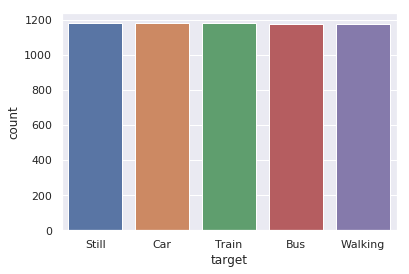

In [9]:
sns.countplot(df["target"])

Percebemos que temos 5 categorias possíveis, todas bem balanceadas entre si.

- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## EDA

### Distribuição de cada feature, considerando cada uma das categorias individualmente

/home/bcoelho/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


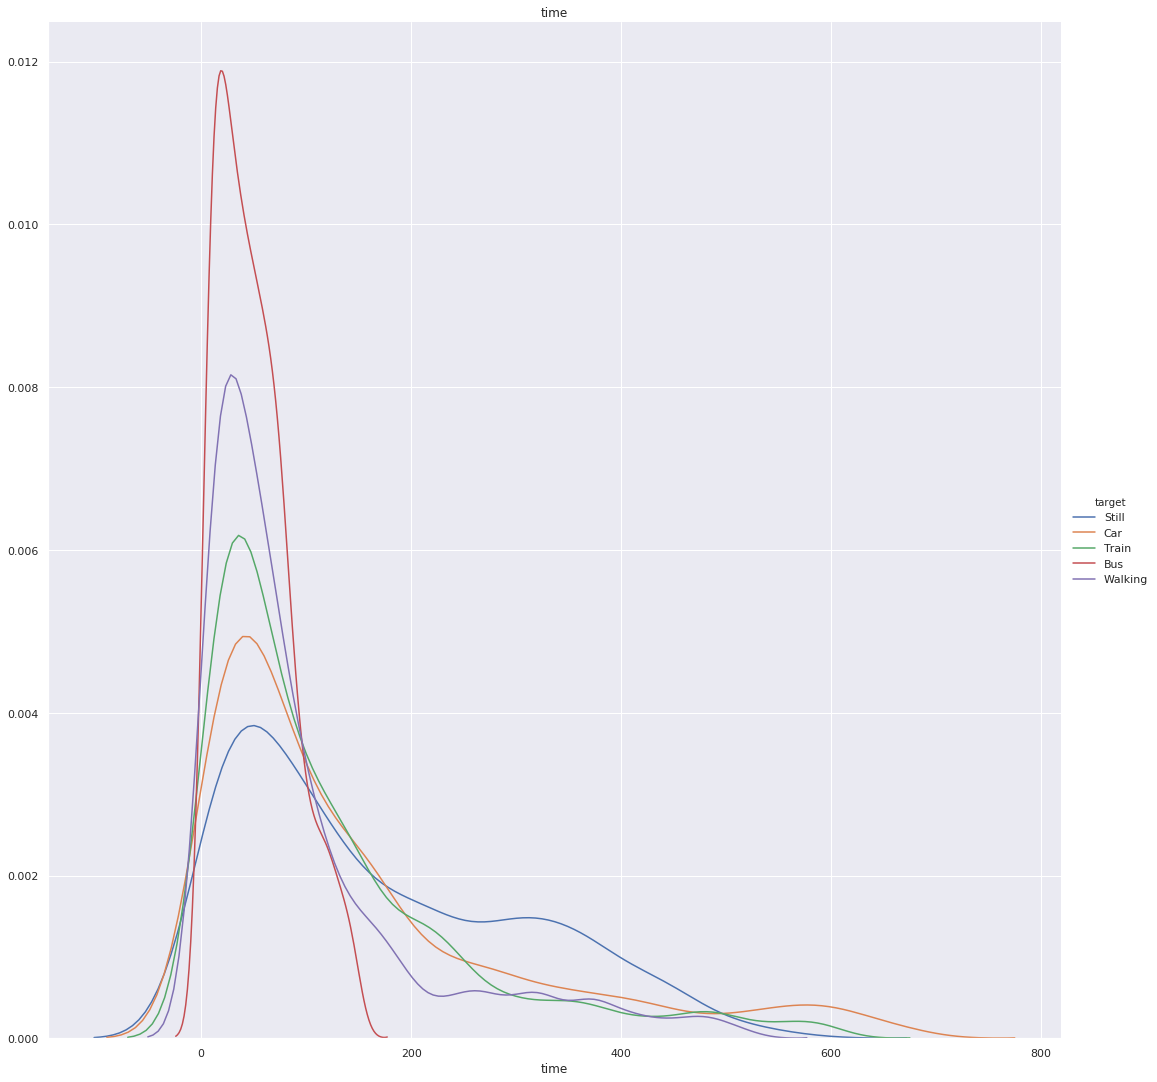

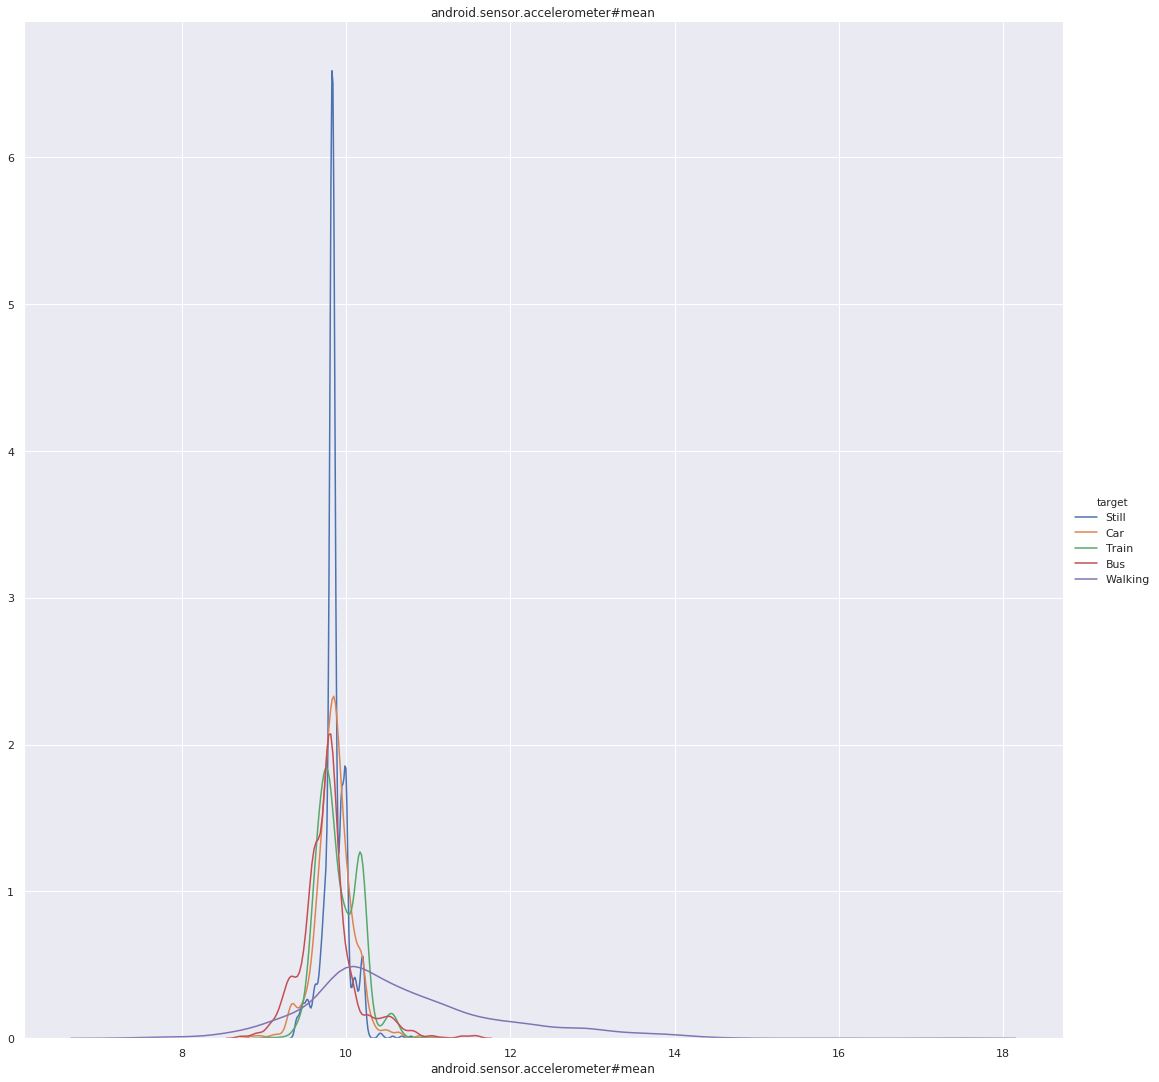

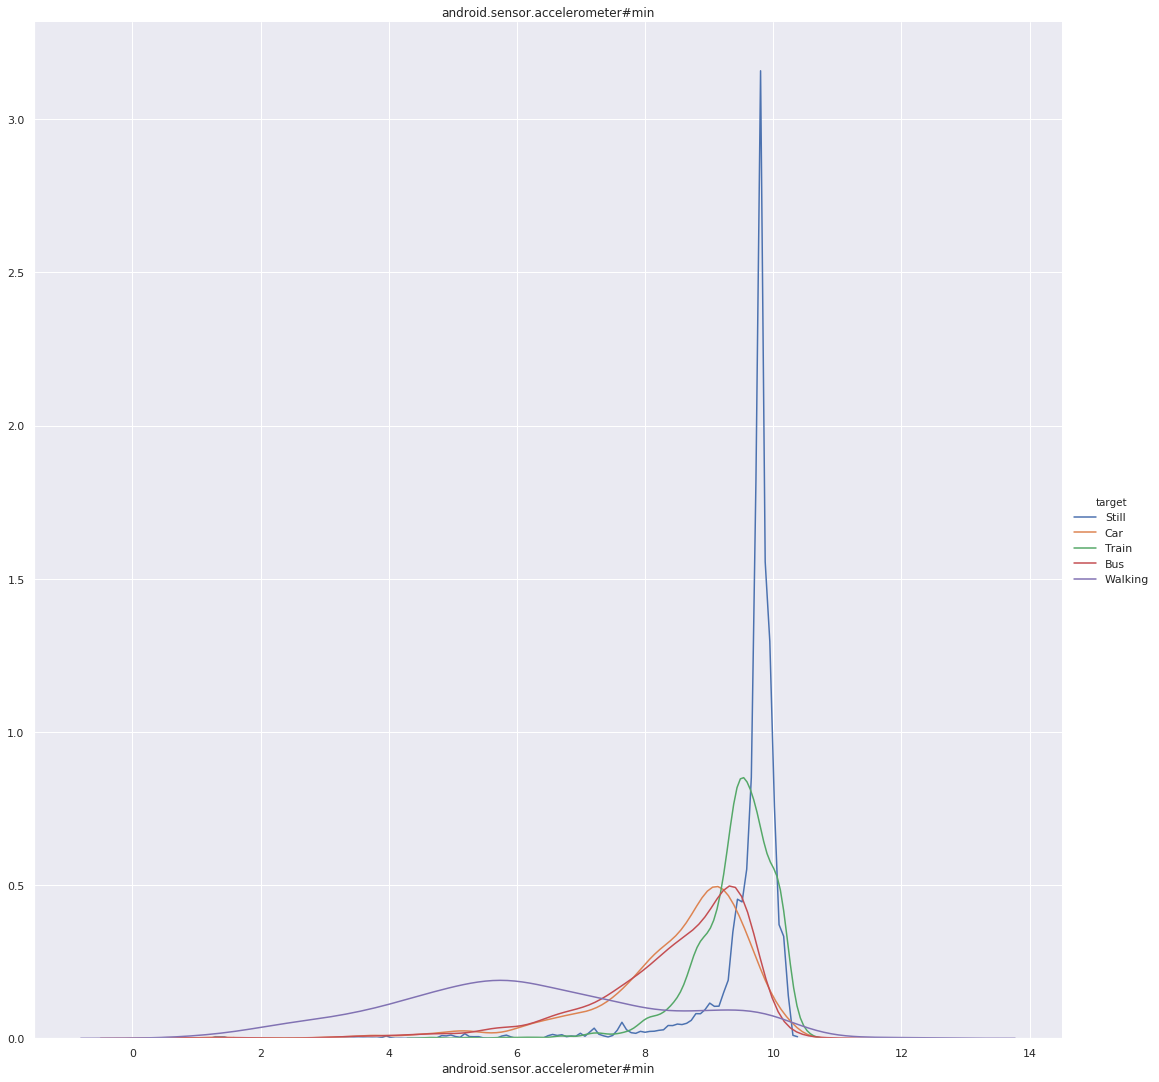

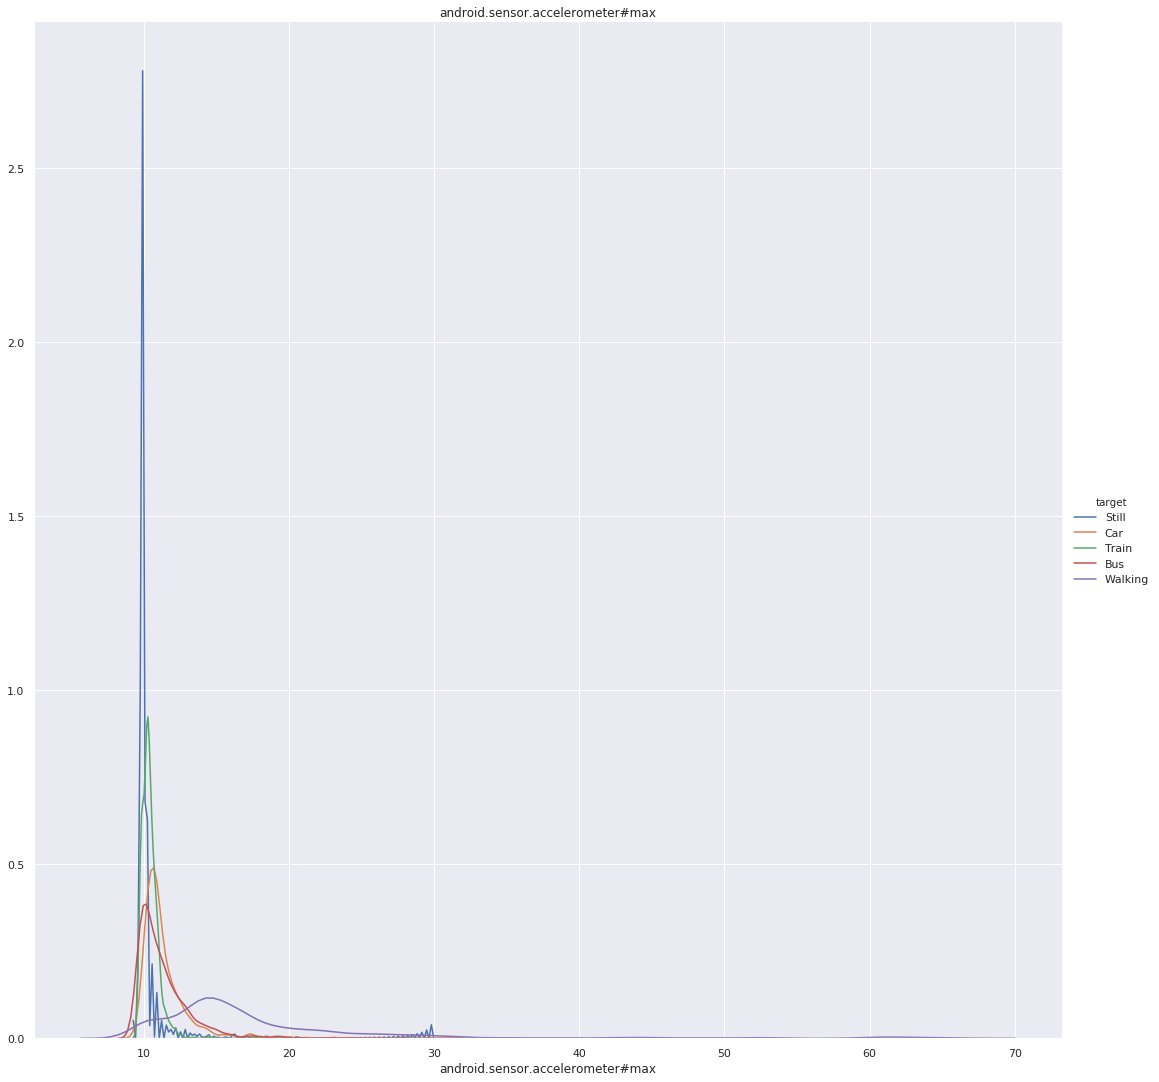

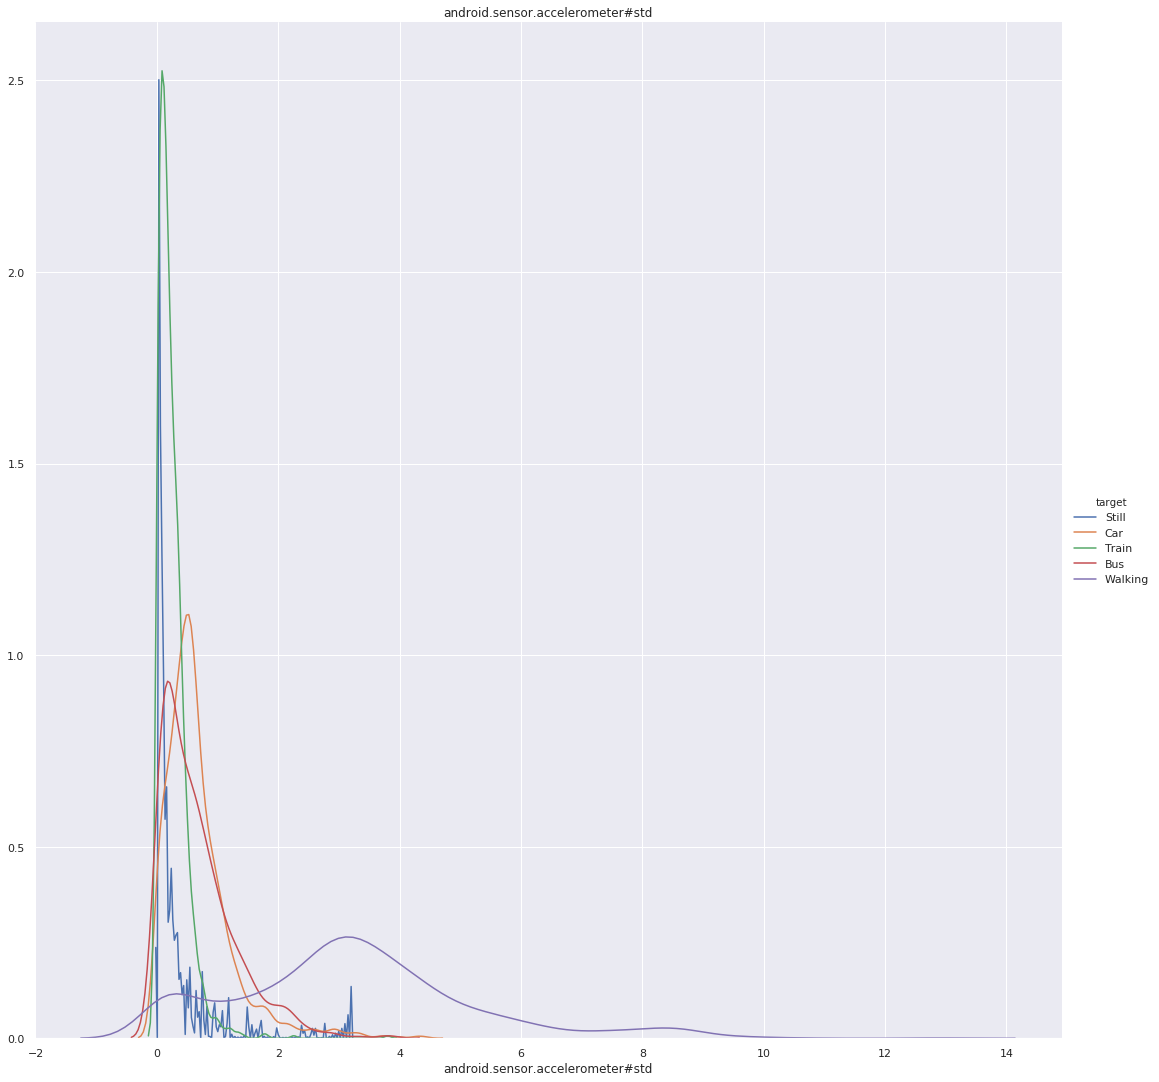

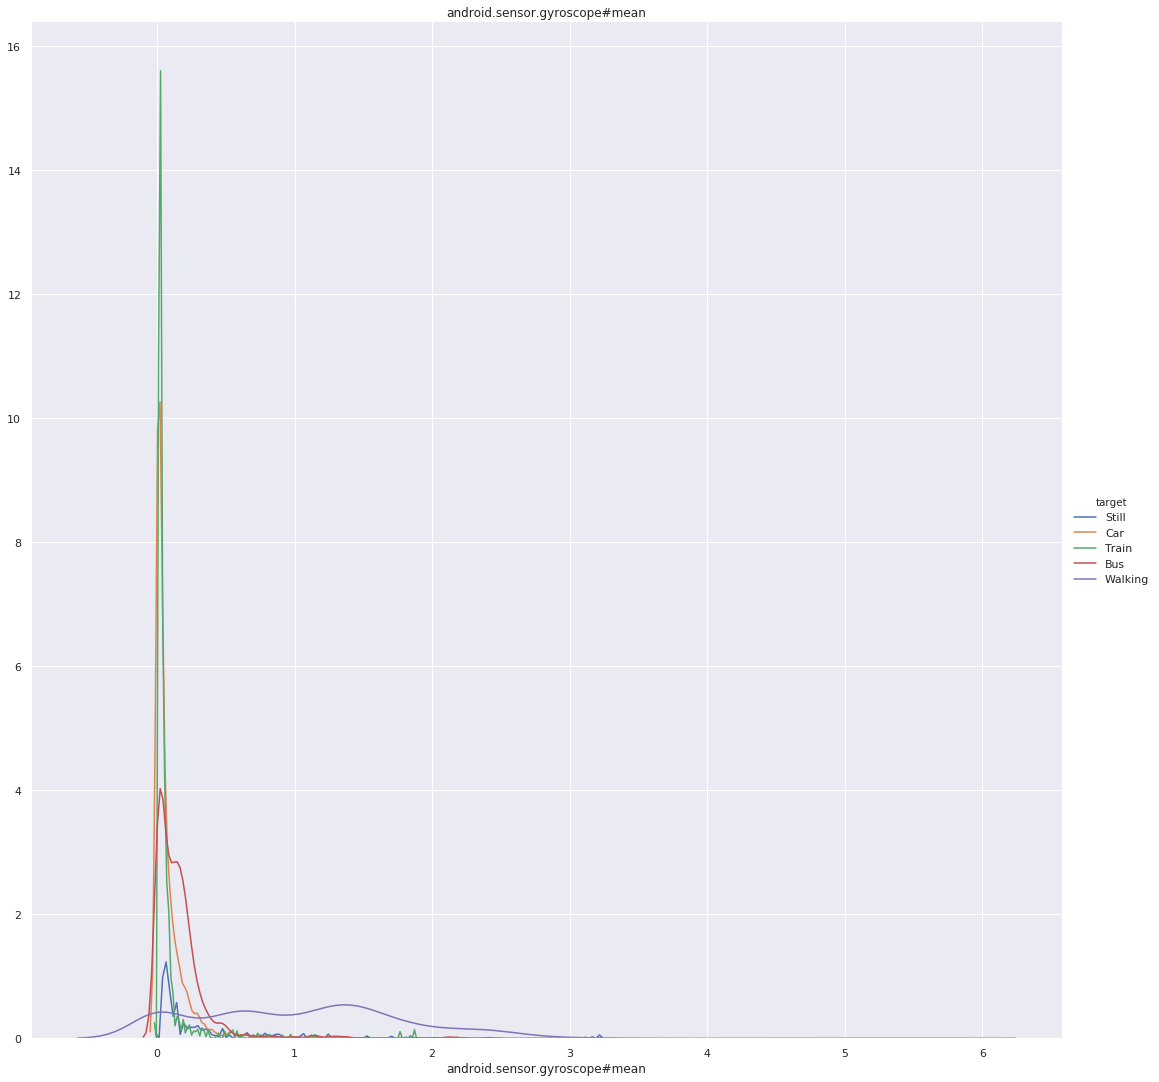

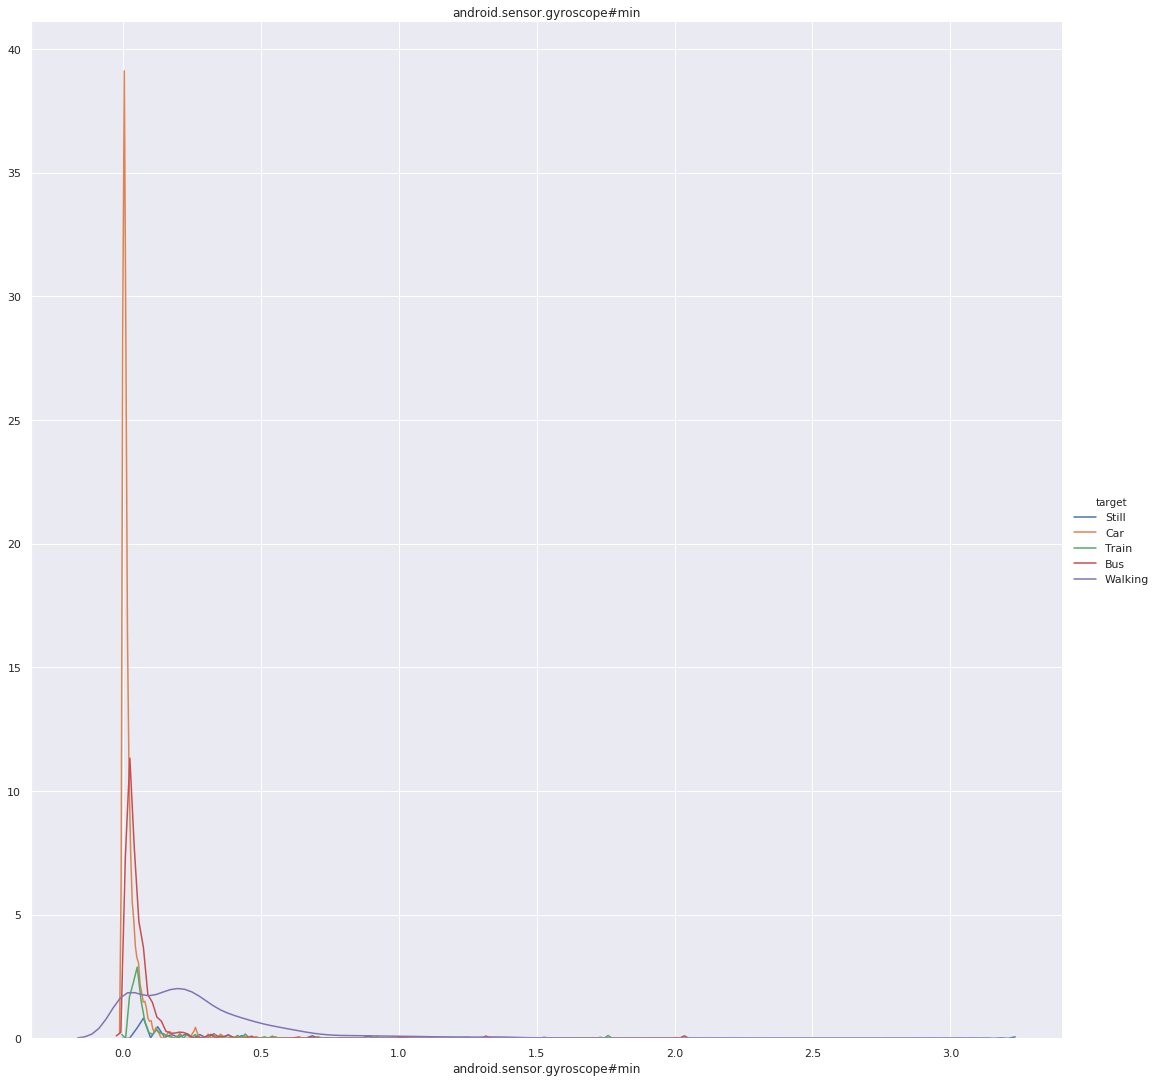

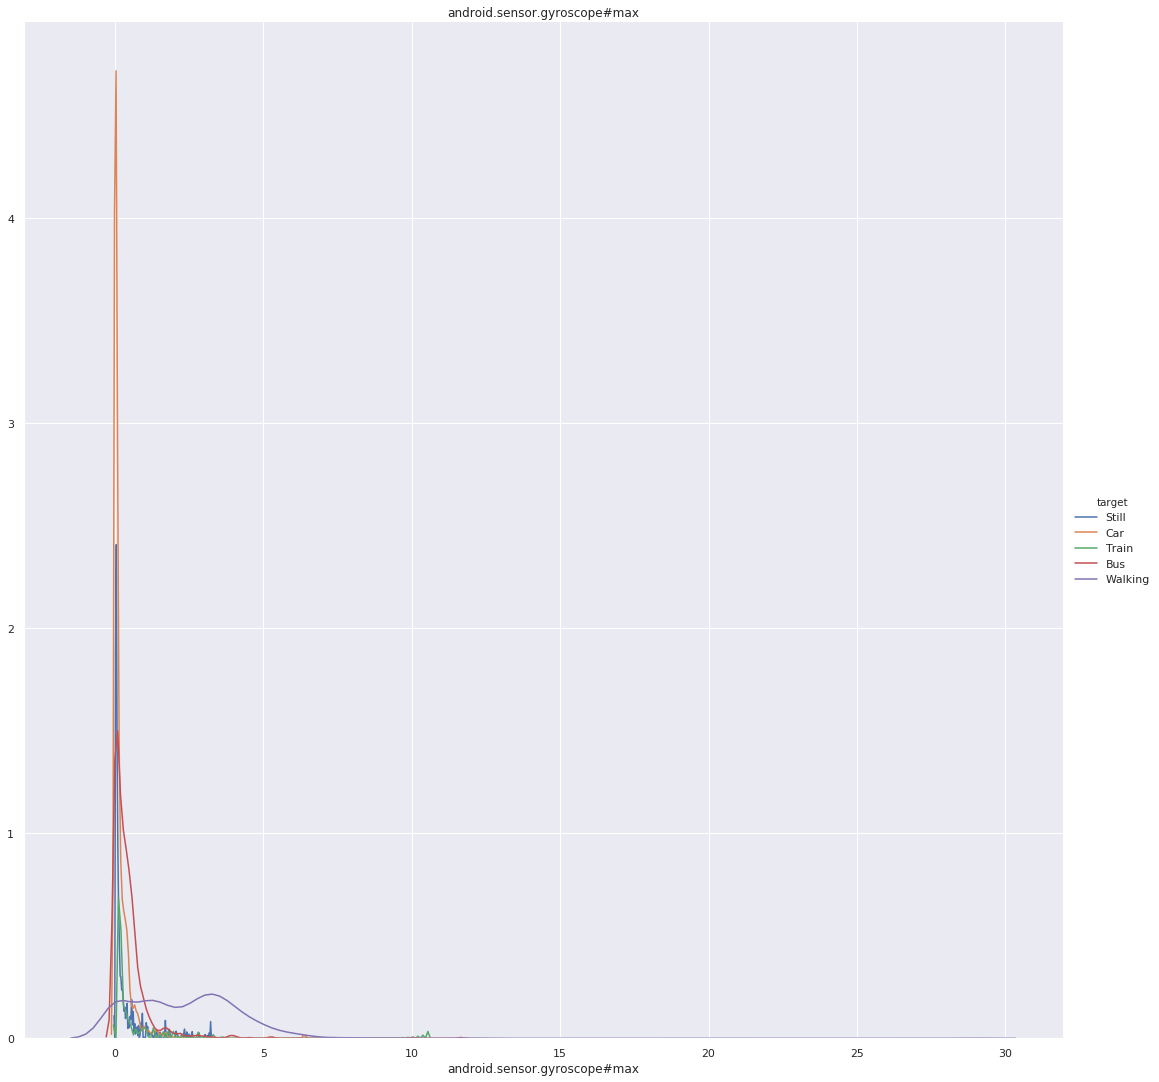

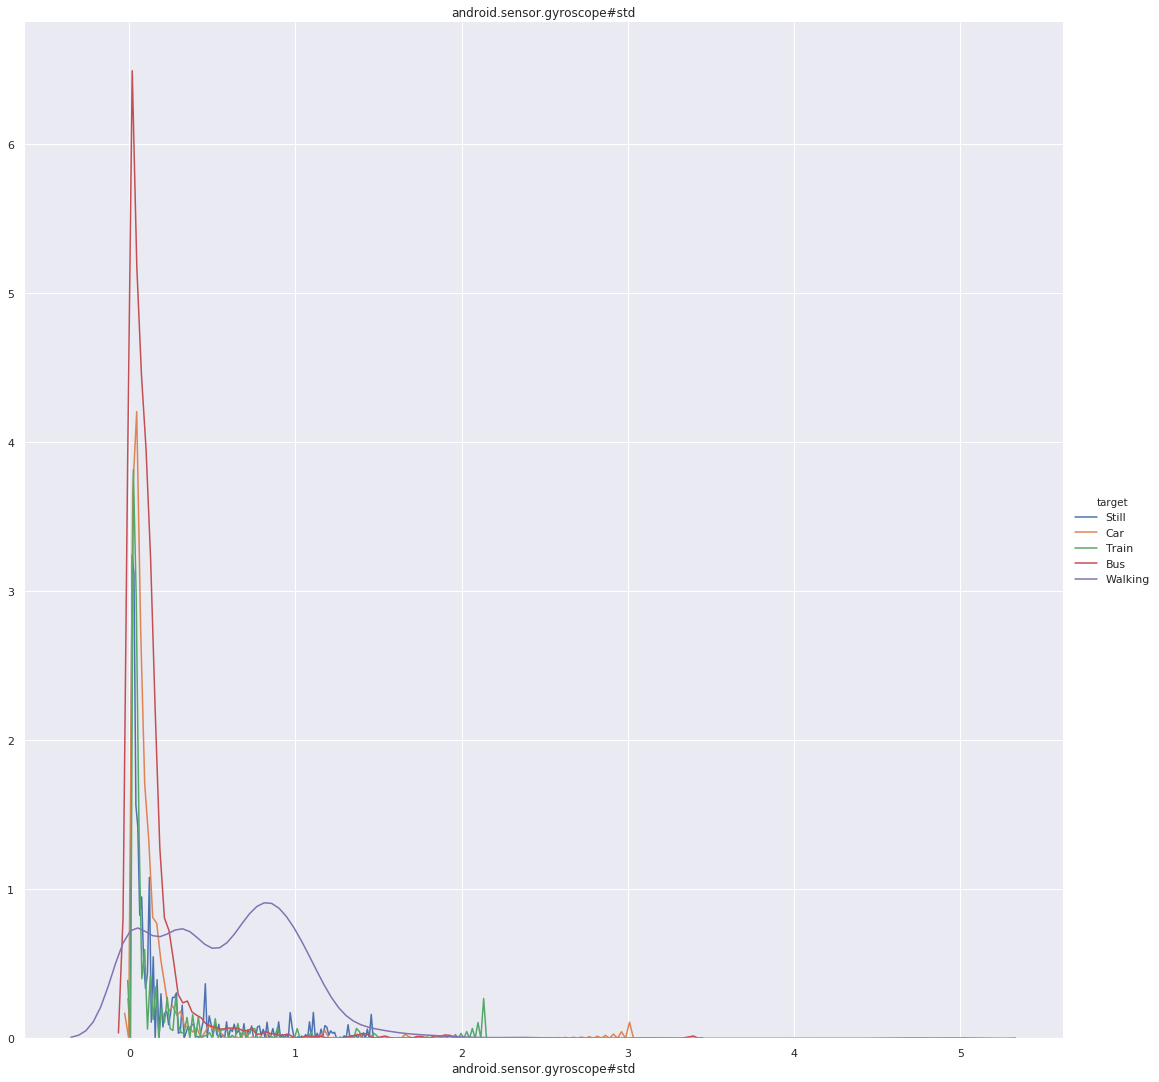

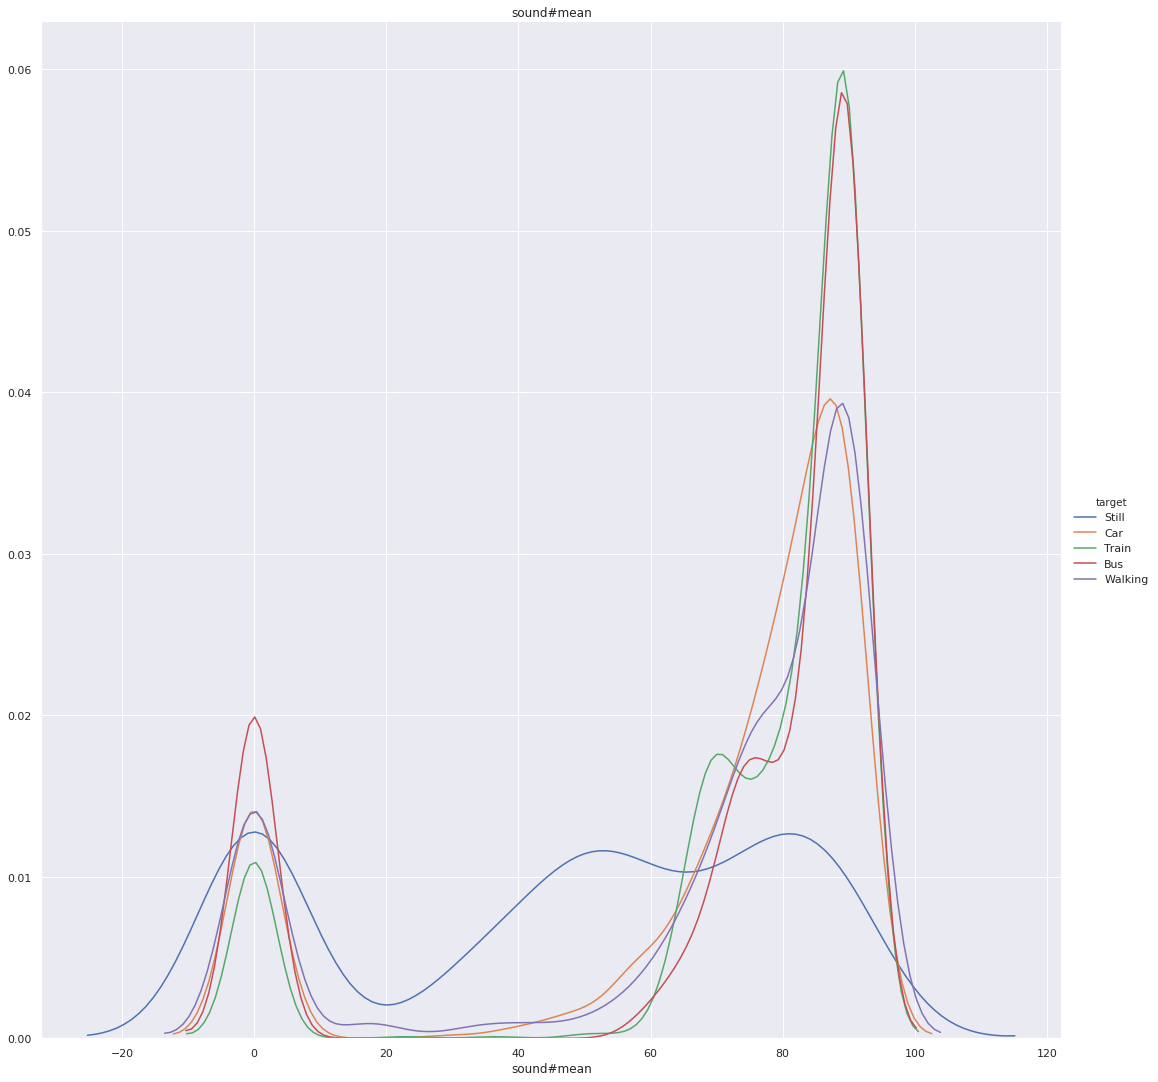

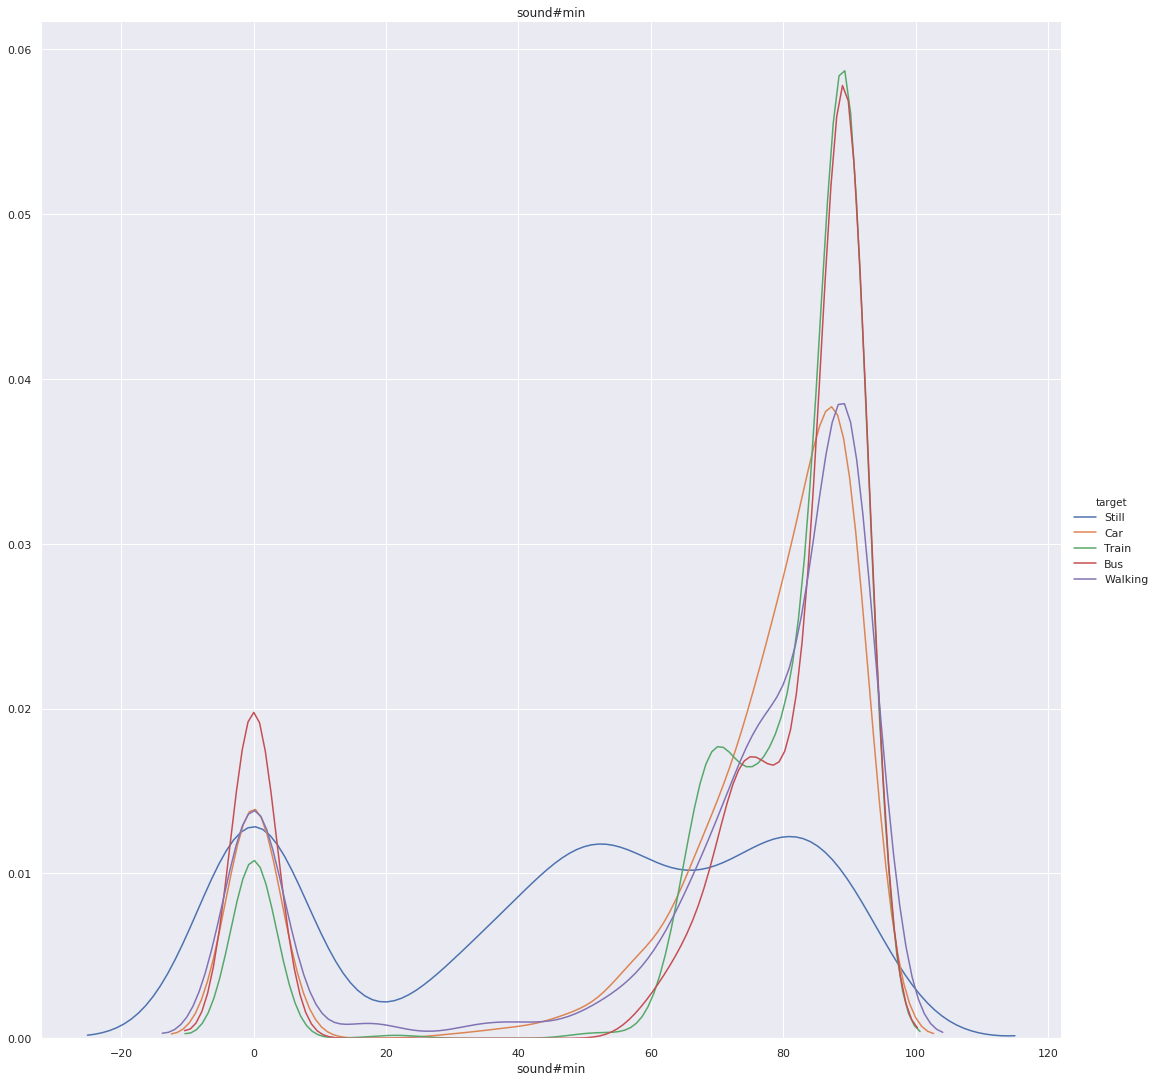

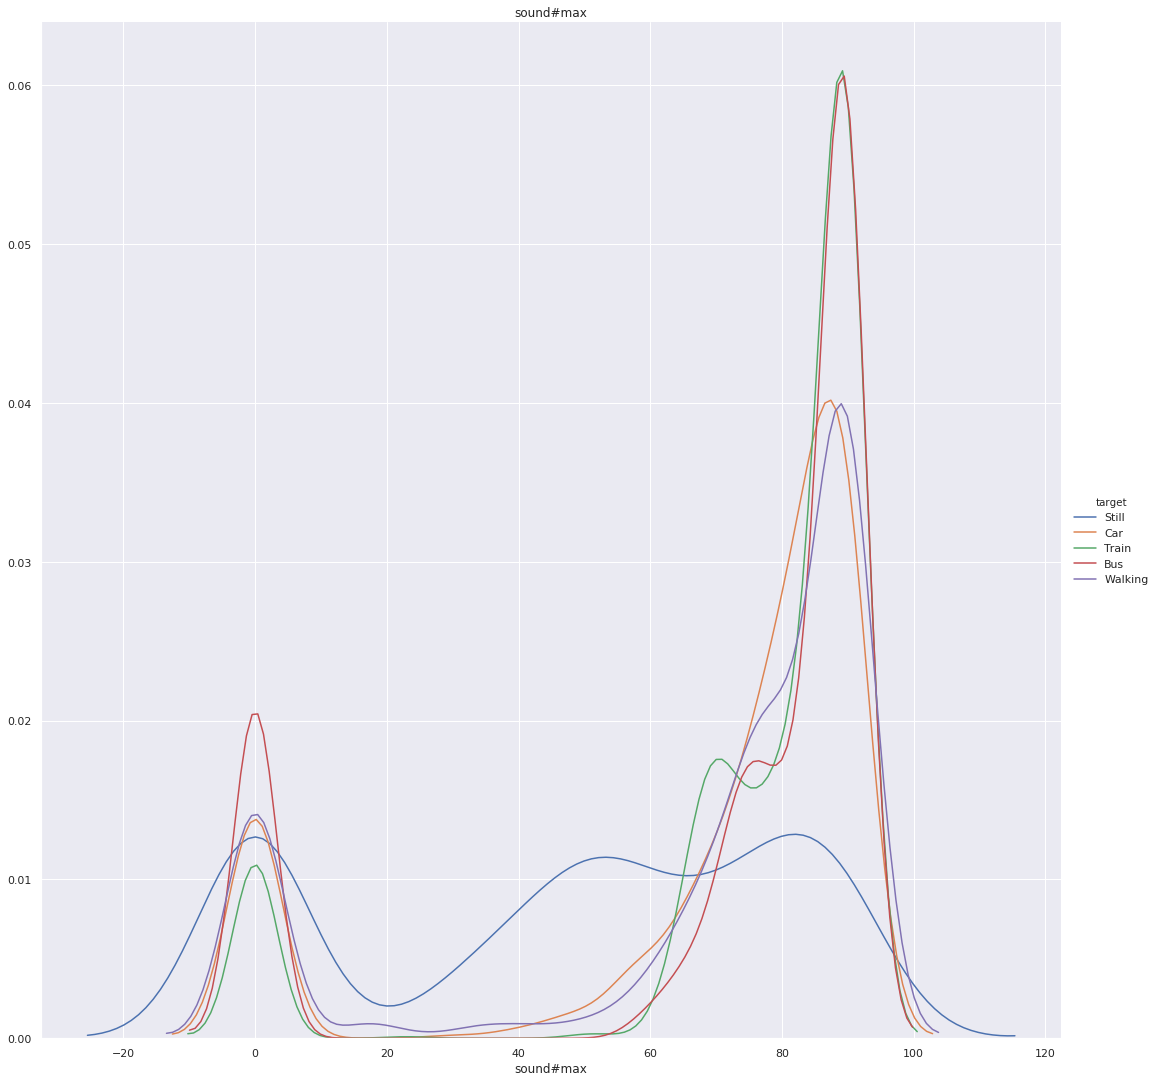

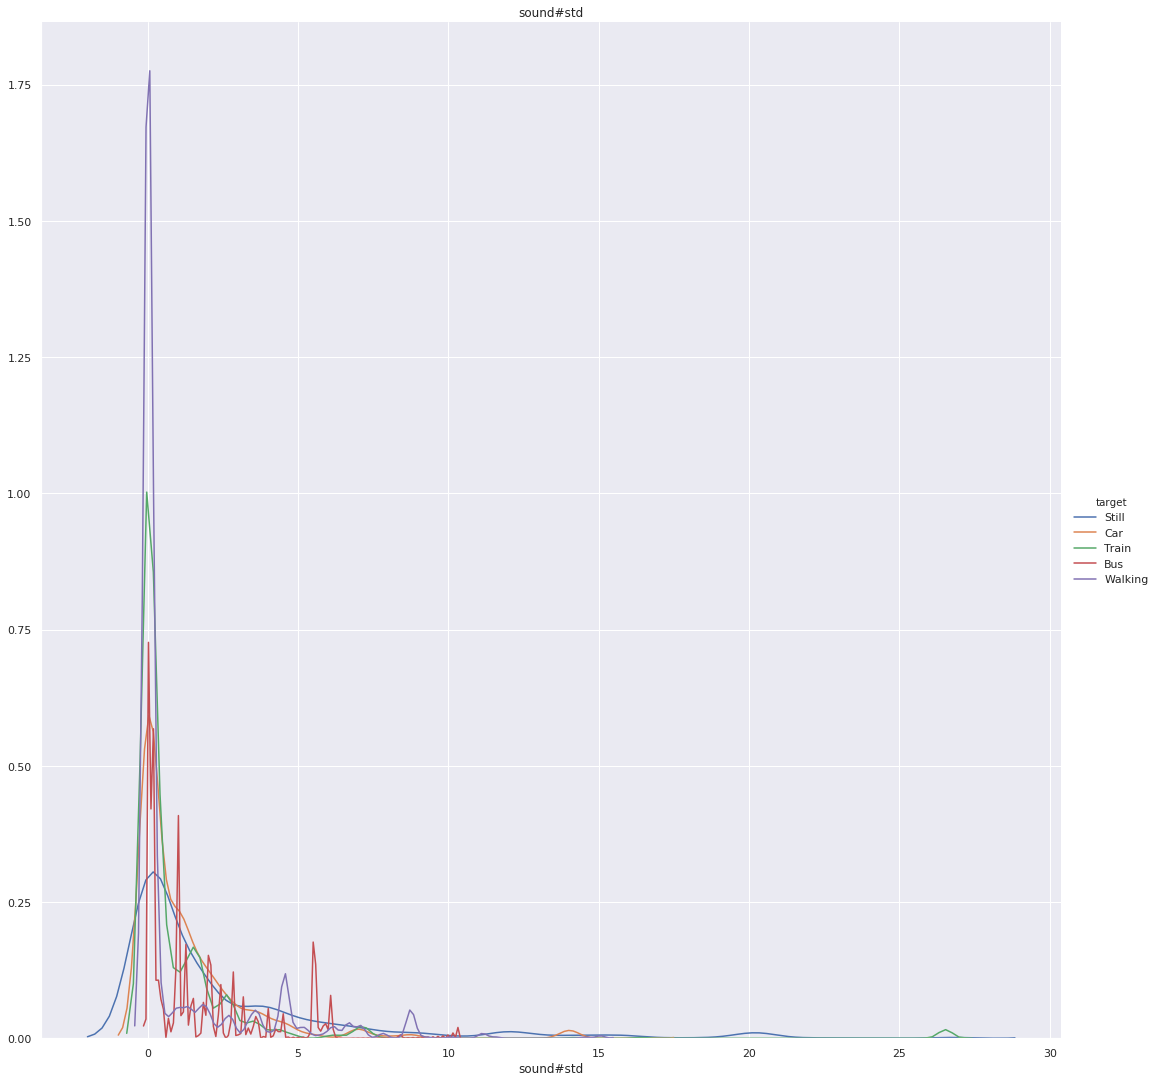

In [10]:
# Plote a distribuição de todas as colunas menos nosso target
for col in df.columns[:-1]:
    g = sns.FacetGrid(df, hue="target", height=15, hue_order=df["target"].unique())
    g.map(sns.distplot, col, hist=False).add_legend()
    plt.title(col)
    plt.show()
    

Com isso percebemos que algumas colunas como sound#min/max/mean tem um comportamento extramamente semelhante, mesmo considerando as diferentes classses.

Vamos ver quantos porcentos são iguais:

In [11]:
def equal_cols(df, col1, col2):
    amount = ((df["sound#min"] == df["sound#mean"]).sum() * 100) / len(df)
    print(f"Cols {col1} and {col2} are equal {amount} % of times")

equal_cols(df, "sound#min", "sound#max")
equal_cols(df, "sound#min", "sound#mean")
equal_cols(df, "sound#max", "sound#mean")

Cols sound#min and sound#max are equal 87.3409129475649 % of times
Cols sound#min and sound#mean are equal 87.3409129475649 % of times
Cols sound#max and sound#mean are equal 87.3409129475649 % of times


### Verificação de outliers e distribuição

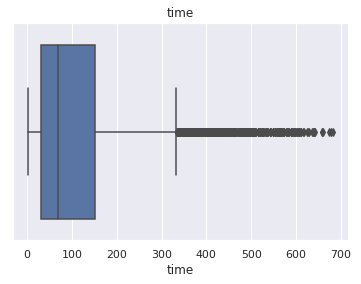

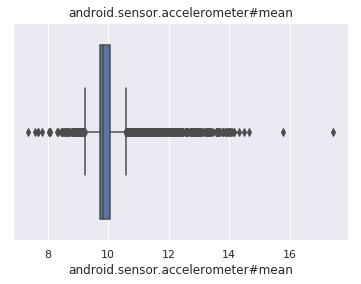

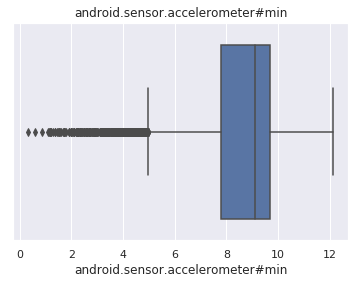

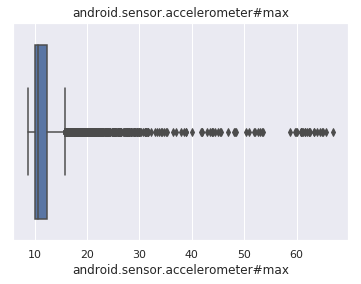

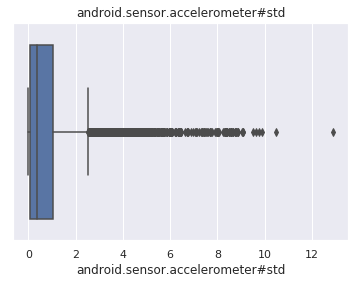

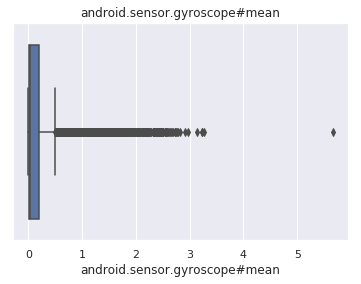

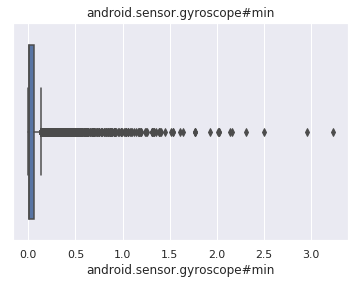

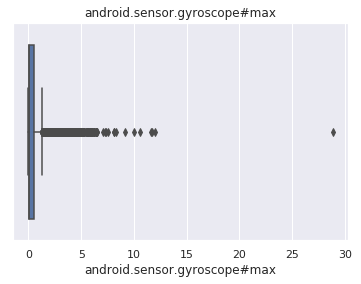

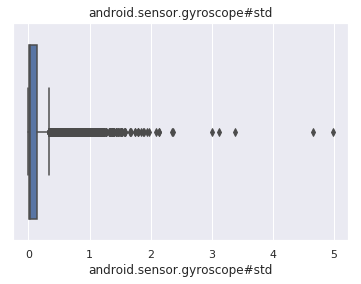

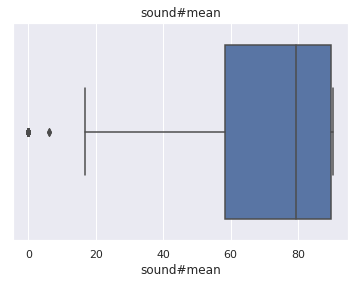

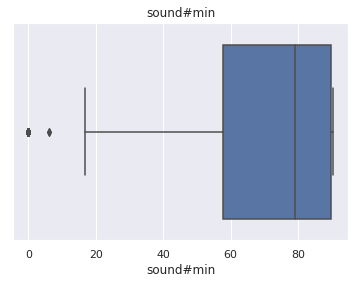

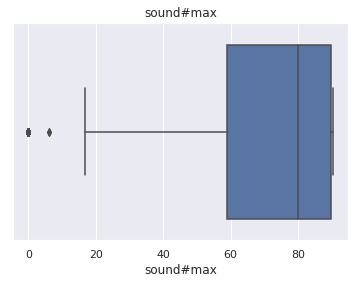

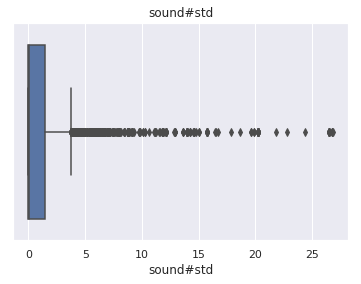

In [12]:
# Plote a distribuição de todas as colunas menos nosso target
for col in df.columns[:-1]:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()
    

Percebemos que considerando 1.5 vezes o IQR, teríamos uma alta quantidade de outliers nas nossas featues
- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# 3  -No caso do classificador Knn, verifique o efeito do parâmetro k na classificação.

Vamos realizar um grid search, considerando cross validation de 5 folds.

Verificamos os valores de K, para K = 1, 3, 5, 7, 9, 11, 13

**OBS**: Vamos para todo o projeto considear a acurácia média como métrica de avaliação.

In [13]:
param_grid = {
    "n_neighbors": [x for x in range(1, 14, 1)]
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, 
                           scoring="accuracy", n_jobs=-1, cv=5, verbose=1, 
                           return_train_score=False)

In [14]:
grid_search.fit(df.drop(columns=["target"]), df["target"])

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=1)

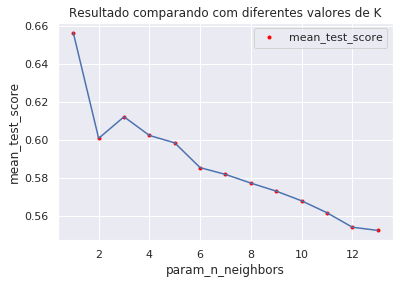

In [15]:
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values("rank_test_score", inplace=True)

plt.plot(results["param_n_neighbors"], results["mean_test_score"], ".", color="red")
sns.lineplot(x="param_n_neighbors", y="mean_test_score", data=results)
plt.title("Resultado comparando com diferentes valores de K");

In [16]:
grid_search.best_score_, grid_search.best_params_

(0.6563719667402003, {'n_neighbors': 1})

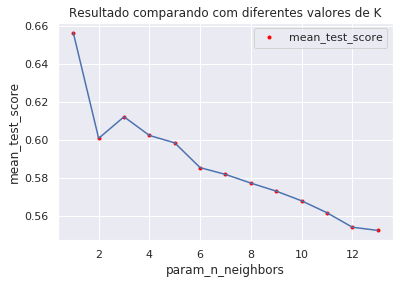

In [17]:
plt.plot(results["param_n_neighbors"], results["mean_test_score"], ".", color="red")
sns.lineplot(x="param_n_neighbors", y="mean_test_score", data=results)
plt.title("Resultado comparando com diferentes valores de K");

Podemos observar que o melhor resultado foi para K = 1, isto é, considerando apenas 1 vizinhos mais próximo

- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# 4 – Compare os classificadores:
- knn(melhor k observado no item anterior)
- Naive Bayes
- Decisão Bayesiana

**OBS**: Estamos considerando o Naive Bayes [Gaussiano](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

**OBS**: Continuamos usando 5 folds.

In [18]:
def run_models(x, y, processing="Nada", names=["Naive Bayes", "1-NN"],
               models = [GaussianNB(), KNeighborsClassifier(n_neighbors=1)]):
    
    model_results = []
    all_results = pd.DataFrame(columns=["Score", "Model", "Pré-Processamento"])

    for model, name in zip(models, names):
        mean_score = cross_val_score(model, x, y, scoring="accuracy", 
                                     cv=5, n_jobs=-1).mean()
        model_results.append(mean_score)
        all_results.loc[len(all_results)] = [mean_score, name, processing]
    return all_results

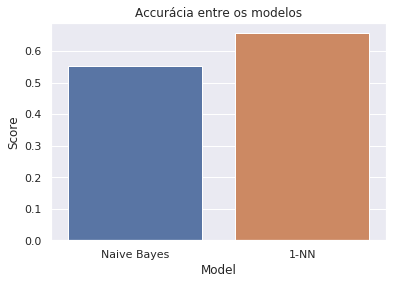

In [19]:
all_results = run_models(df.drop(columns="target"), df["target"])
sns.barplot(y="Score", x="Model", data=all_results)
plt.title("Accurácia entre os modelos");

In [20]:
all_results.head()

,Score,Model,Pré-Processamento
0,0.553188,Naive Bayes,Nada
1,0.656369,1-NN,Nada


Conforme podemos observar, o K-NN com o melhor K do último exercício (K=1) obteve o melhor resultado entre os 3 modelos

- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# 5 – Normalização e padronização

Verifique o efeito da normalização (atributos em [0,1]) e padronização (atributos com média 0 e variância 1) dos dados. Compare os casos sem processamento, com padronização e com normalização para os classificadores:

- knn(melhor k observado no item anterior)
- Naive Bayes
- Decisão Bayesiana

## Normalização

In [21]:
normalized_x = minmax_scale(df.drop(columns="target"))
all_results = all_results.append(run_models(normalized_x, df["target"], "Normalizado"), 
                                 ignore_index=True)

## Padronização

In [22]:
scaled_x = scale(df.drop(columns="target"))
all_results = all_results.append(run_models(scaled_x, df["target"], "Padronizado"),
                                 ignore_index=True)

## Comparação entre os 3

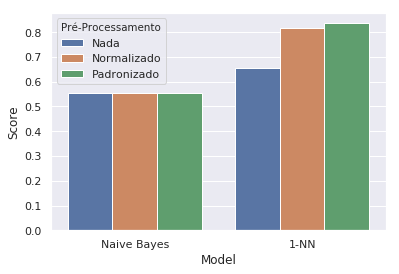

In [23]:
sns.barplot(data=all_results, y="Score", x="Model", hue="Pré-Processamento")

Conforme podemos observar, 1-NN melhorou seus resultados conforme a normalização/padronização dos dados, devido a ser sensível a escala das features considerando a métrica de distância que estamos usando.

- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# 6 – Correlação

Mostre a matriz de correlação entre os atributos. Considere os atributos com menor correlação (por exemplo, menor do que 0.5). Realize a classificação novamente apenas com esses atributos. A acurácia melhora?

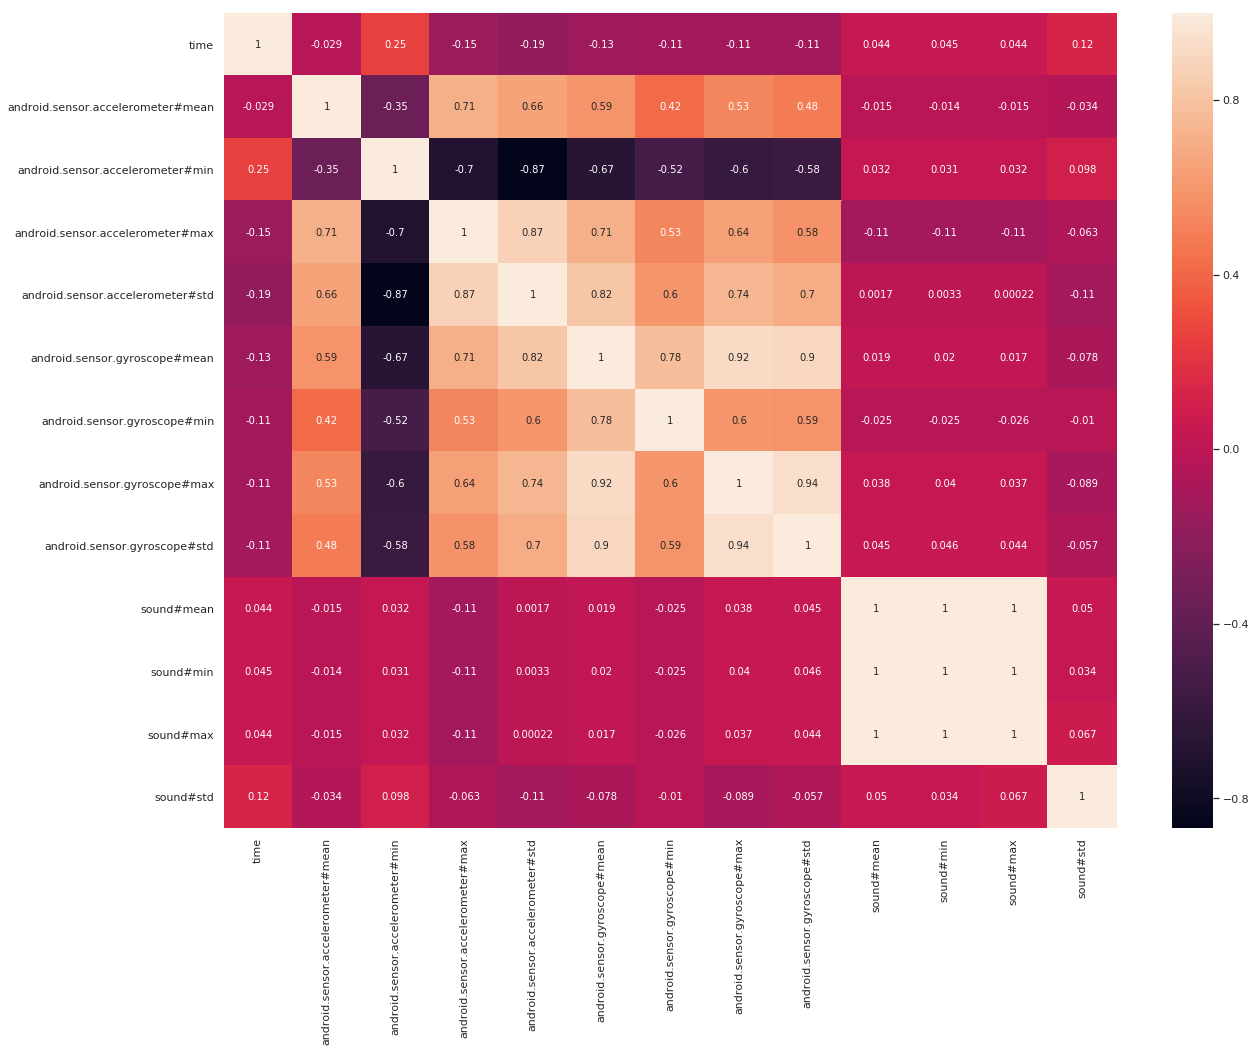

In [24]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.drop(columns="target").corr(), annot=True)

# 7 – Ruídos

Verifique qual dos classificadores é mais robusto com relação à presença de ruídos. Para isso: 

- Aplique a normalização dos dados para que os atributos apresentem média igual a zero e variância igual a 1.

- Inclua em X% dos atributos, um valor normalmente distribuído com média zero e variância 1. Considere toda a matriz dos dados, sorteando uma posição da matriz de forma aleatória.

- Varie o nível de ruído, de 0 a 50% (em passos de 5%) e avalie como muda a classificação. Construa um gráfico de X%de ruídoversus porcentagem de classificação correta. Coloque a média e o desvio padrão calculados a partir de ao menos 10 simulações. Considere 70% dos dados no conjunto de treinamento.
- Discuta os resultados

Como podemos observar, tanto o NB Gaussiano como o Bernoulli não foram afetados pela normalização dos dados;

Porém o Multinomial foi afetado e obteve sua melhor acurácia quando os dados estavam normalizados.


- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# 8 – Naive Bayes

No caso do classificador Naive Bayes, é possível considerar diferentes funções para estimar as probabilidades. Compare os casos: (i) Gaussian Naive Bayes, (ii) multinomial Naive Bayese (iii)Bernoulli Naive Bayes. Considere os casos com e sem padronização.

In [25]:
models = [GaussianNB(), MultinomialNB(), BernoulliNB()]
names = ["Gaussian", "Multinomial", "Bernoulli"]

# Sem normalização
all_results = run_models(df.drop(columns="target"), df["target"], 
                         names=names, models=models)

# Com normalização
normalized_x = minmax_scale(df.drop(columns="target"))
all_results = all_results.append(run_models(normalized_x, df["target"], "Normalizado", 
                                             names=names, models=models), 
                                 ignore_index=True)
all_results

,Score,Model,Pré-Processamento
0,0.553188,Gaussian,Nada
1,0.372145,Multinomial,Nada
2,0.291368,Bernoulli,Nada
3,0.553527,Gaussian,Normalizado
4,0.536062,Multinomial,Normalizado
5,0.291538,Bernoulli,Normalizado


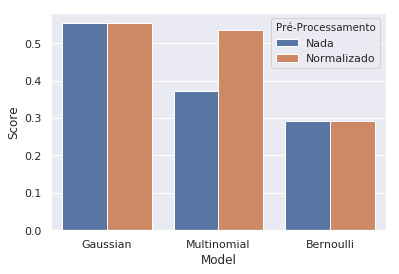

In [26]:
sns.barplot(data=all_results, y="Score", x="Model", hue="Pré-Processamento")

Como podemos observar, tanto o NB Gaussiano como o Bernoulli não foram afetados pela normalização dos dados;

Porém o Multinomial foi afetado e obteve sua melhor acurácia quando os dados estavam normalizados.


- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

Conforme podemos observar, 1-NN melhorou seus resultados conforme a normalização/padronização dos dados, devido a ser sensível a escala das features considerando a métrica de distância que estamos usando.

- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# 9 – Parâmetros K-NN

No caso do Knn, compare as classificações usando diferentes métricas. Varie k e mostre as curvas (em um mesmo plot) para as distâncias euclidiana, Manhattan, Chebysheve e Minkowsky (p=0.5, p=1.5, p = 3).


In [27]:
metrics = ["euclidean", "manhattan", "chebyshev"] + ["minkowski"]*3
power_param = [""]*3 + [5, 1.5, 3]
names = [x+str(y) for x, y in zip(metrics, power_param)]# for y in power_param]
for k in range(1, 14):
    models = []
    for dist, p in zip(metrics, power_param):
        models.append(KNeighborsClassifier(n_neighbors=k, metric=dist, p=p))
    all_results = run_models(df.drop(columns="target"), df["target"], 
               names=names, models=models, processing=str(k))
    break

# OBS: 5 or 0.5?


- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# 10– Porcentagem de treino

Faça um gráfico da fração de elementos no conjunto de treinamento (10% até 90% em passos de 10%) versus acurácia para os classificadores:

- knn(melhor k observado anteriormente)
- Naive Bayes
- Decisão Bayesiana

Considere os casos com e sem padronização


- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>